# 1.2 Elements of Linear Algebra

<a target="_blank" href="https://colab.research.google.com/github/SaajanM/mat422-homework/blob/main/1.2%20Elements%20of%20Linear%20Algebra/elements_of_linear_algebra.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

In [1]:
# Install a numpy package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib

In [88]:
# Import the numpy package
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D
import math

$\newcommand\norm[1]{\left\lVert#1\right\rVert}$

This section covers the basics of linear algebra with respect to the vector space $\mathbb{R}^n$

## Section 1.2.0 Vector Spaces

This is not directly included in the notes, however I believe it is worthwile to mention.

Due to the complexity of the topic, we restrict our discussion of vector spaces to only cover spaces over the field of real numbers $\mathbb{R}$. But it is entirely possible to replace $\mathbb{R}$ with some other field. However, as this is a data science class, this is usually unnecessary.

For a definition of a field see: [Field_(mathematics)](https://en.wikipedia.org/wiki/Field_(mathematics))

**Defintion:** A set $V$ paired with operations $+$ (called vector addition) and $\cdot$ (scalar multiplication - usually implicitly written) is called a **Vector Space** if the following properties hold: 
- For $\mathbf{u},\mathbf{v},\mathbf{w}\in V$ it holds that $\mathbf{u}+(\mathbf{v}+\mathbf{w}) = (\mathbf{u}+\mathbf{v})+\mathbf{w}$ (Associativity of Vector Addition)
- For $\mathbf{u},\mathbf{v}\in V$ it holds that $\mathbf{u}+\mathbf{v} = \mathbf{v}+\mathbf{u}$ (Commutativity of Vector Addition)
- There exists an element $\mathbf{0}\in V$ called the **zero vector** such that $\mathbf{v}+\mathbf{0} = \mathbf{v}$ for all $\mathbf{v}\in V$ (Additive Identity)
- For each $\mathbf{v}\in V$ there exists an element $-\mathbf{v}\in V$ such that $\mathbf{v} + (-\mathbf{v}) = \mathbf{0}$ (Additive Inverse)
- For each $a,b\in\mathbb{R}$ and for each $\mathbf{v}\in V$ it holds that $(ab)\mathbf{v} = a(b\mathbf{v})$ (Scalar and Field Multiplicative Compatability)
- There exists a scalar $1\in \mathbb{R}$ so that for all $\mathbf{v}\in V$ it holds that $1\mathbf{v} = \mathbf{v}$ (Multiplicative Identity)
- For all $a,b\in\mathbb{R}$ and $\mathbf{v}\in V$ it holds that $(a+b)\mathbf{v} = a\mathbf{v} + b\mathbf{v}$ (Distribution of Multiplication over Field Addition)
- For all $\mathbf{u},\mathbf{v}\in V$ and $a\in \mathbb{R}$ it holds that $a(\mathbf{u} + \mathbf{v}) = a\mathbf{u} + a\mathbf{v}$ (Distribution of Multiplication over Vector Addition)

Vector spaces are one of the key elements of linear algebra. They form the essence of the field, with all future discussions centering around elements of such spaces. The axioms above outline enough of a "shell" around the sets such that we can derive several useful properties.

For example, we can obtain several familiar properties, with the zero vector acting as we expect it to and the identity scalar also acting similarly as it interacts with other scalars.

Note: It is interesting to point out to those familiar with matrices that the cross product is nowhere to be found. In fact the cross product is not entirely native to the concept of vector spaces and can often be better expressed through the concept of ["an algebra over a field"](https://en.wikipedia.org/wiki/Algebra_over_a_field). This is beyond the scope of this explainer however.

In the future, we will choose $V = \mathbb{R}^n$.

## Section 1.2.1 Linear Subspaces

**Definition:** A set $U\subseteq \mathbb{R}^n$ is called a linear subspace if the following conditions hold:
- For all $\mathbf{u},\mathbf{v}\in U$ it is true that $\mathbf{u} + \mathbf{v} \in U$ (Closure under Vector Addition)
- For all $a\in\mathbb{R}$ and $\mathbf{u}\in U$ it is true that $a\mathbf{u}\in U$ (Closure under Scalar Multiplication)

Often times in the vector space $\mathbb{R}^n$, it is not useful to analyze the entire space. This is because interesting properties often crop up in smaller subspaces.

Notice how $\mathbb{R}^n\subseteq \mathbb{R}^n$, so $\mathbb{R}^n$ is a linear subspace of itself. The following shows how $\mathbb{R}^3$ is closed under vector addition and scalar multiplication

In [7]:
test_vectors = [np.random.rand(3) for _ in range(100)]

test_scalars = [np.random.rand() for _ in range(100)]

out = []

for i in range(len(test_vectors)):
    for j in range(len(test_vectors)):
        for k in range(len(test_scalars)):
            out.append(test_vectors[i] + test_scalars[k] * test_vectors[j])

res = any([np.shape(u) == (3,) for u in out])
print("All output vectors share the same dimensions (n=3)?: {}".format(res))

All output vectors share the same dimensions (n=3)?: True


One trivial subspace beyond the same set is the set $\{\mathbf{0}\}$. We call this the zero subspace.

### 1.2.1.1 Linear Combinations

**Definition:** Let $W\subseteq\mathbb{R}^n$ be some set of vectors with $W=\{\mathbf{w}_1,\dots,\mathbf{w}_m\}$. The **span** of $W$ is the set of all linear combinations of $W$. That is,
$$
\text{span}(W) = \left\{\left.\sum_{j=1}^m a_j\mathbf{w}_j\right\vert a_1,\dots,a_j\in\mathbb{R}\right\}
$$

It is the case that every span of some set of vectors is a linear subspace of the entire vector space. The following code demonstrates this.

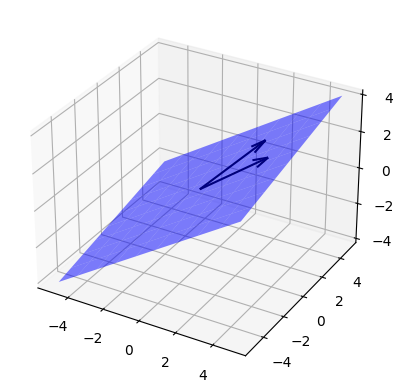

In [80]:
rng_set_of_two = [np.random.rand(3) for _ in range(2)]

cross = np.cross(rng_set_of_two[0], rng_set_of_two[1])

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

X, Y = np.meshgrid(x, y)

Z = (cross[0] * X + cross[1] * Y) / -cross[2]

fig = pyplt.figure()
ax = fig.add_subplot(projection="3d")

surf = ax.plot_surface(X, Y, Z, facecolor=(0, 0, 1, 0.5), zorder=1)

vecs = [4 * i / np.linalg.norm(i) for i in rng_set_of_two]

ax.quiver(
    0,
    0,
    0,
    vecs[0][0],
    vecs[0][1],
    vecs[0][2],
    color="black",
    arrow_length_ratio=0.2,
    zorder=2,
)
ax.quiver(
    0,
    0,
    0,
    vecs[1][0],
    vecs[1][1],
    vecs[1][2],
    color="black",
    arrow_length_ratio=0.2,
    zorder=2,
)

# Blue surface is the 2D subspace that is the span of the vectors. Vectors are normalized then scaled up.

### 1.2.1.2 Linear Independence and Dimension

When studying some set of data, it is nice to have a description of the "shape" of the data to avoid having to use examples.

**Defintion:** (Linear Independence) A set of vectors $\{\mathbf{u}_1,\dots,\mathbf{u}_m\}$ is linearly
independent if none of them can be written as a linear combination of the
others. That is for all $1\leq i\leq m$
$$
    \mathbf{u}_i \not\in \text{span}(\{\mathbf{u}_j\vert j\neq i\})
$$

If the above property does not hold, the set is called Linearly Dependent.

An example of linear **dependence** is shown below (indepence is not possible to show via code *in general* without further theory).

In [82]:
u = np.array([0, 1, 1])
v = np.array([1, 1, 0])

w = np.array([15, 30, 15])

res = all(w == 15 * u + 15 * v)

print("Is w equal to 15*u + 15*v?: {}".format(res))

Is w equal to 15*u + 15*v?: True


**Definition:** A basis of a linear subspace $U$ is a set of vectors $B$ such that $\text{span}(B) = U$ and $B$ is linearly independent

We denote by $\{\mathbf{e}_1,\dots, \mathbf{e}_n\}$ the standard basis of $\mathbb{R}^n$, where $\mathbf{e}_i$ has a one in coordinate $i$ and zeros in all other coordinates.

Having a basis is nice because we can express any vector as a linear combination of the basis.

This also allows us to represent linear transformations as matrices in a particular basis.

**Theorem:** (Dimension Theorem) Let $U$ be a linear subspace of $\mathbb{R}^n$. Any basis $B$ of $U$ has the same cardinality. We call this the dimension of $U$ and it gives us an idea of the "shape" of the subspace. We denote it $\text{dim}(U)$

The following code uses the standard basis to show that the dimension of $\mathbb{R}^n$ is $n$ for $n=3$

In [85]:
# The identity matrix is just the standard basis arranged in square form.
# If the shape of the matrix is (3,3) then the dimension of R^n is n for n=3

ident = np.identity(3)
print(ident)
print("Is Shape (3,3)?: {}".format(ident.shape == (3, 3)))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Is Shape (3,3)?: True


## Section 1.2.2 Orthogonality

### 1.2.2.1 Orthonormal Bases

Just because all bases are of the same size for a given vector space, does not make them all equal in mathematical and analytical prowess. Often we wish to have something like the standard basis, where any "movement" in the direction of one of the basis vectors yields no movement in any of the others and steps are of equal size in all directions.

**Definition:** The **inner product** of vectors $\mathbf{u},\mathbf{v}$, is  defined as $\langle \mathbf{u},\mathbf{v}\rangle = \sum_{i}^{n}u_i v_i$.

**Definition:** The **norm** of a vector $\mathbf{u}$ is defined as $\norm{u}=\sqrt{\langle\mathbf{u},\mathbf{u}\rangle}$

The following code snippet demostrates the built in `numpy` commands for calculating the inner product and norm of a vector.

In [90]:
u = np.random.rand(3)
v = np.random.rand(3)

print("Inner product of u and v: {}".format(np.dot(u, v)))

norm1 = np.linalg.norm(u)
norm2 = math.sqrt(np.dot(u, u))
res = norm1 == norm2

print("Norm of u: {}".format(norm1))
print("Norm of u via inner product: {}".format(norm2))
print("Are the norms the same?: {}".format(res))

Inner product of u and v: 0.3889392637721869
Norm of u: 0.6223052104169203
Norm of u via inner product: 0.6223052104169203
Are the norms the same?: True


**Definition:** Two vectors are **orthogonal** if the inner product of the two is zero.

**Definition:** A basis is considered **orthonormal** if each of the elements are orthogonal to all the others and are all of norm one.

The following code snippet shows the standard basis for $\mathbb{R}^3$ is orthonormal. Specifically, it shows the pairwise orthogonality, since the norm of one is fairly trivial to see.

In [92]:
standard = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0, 0, 1])]

res = True

for ei in standard:
    for ej in standard:
        if all(ei == ej):
            continue
        orthogonal = np.dot(ei, ej) == 0
        res &= orthogonal

print("All unequal pairs orthogonal?: {}".format(res))

All unequal pairs orthogonal?: True


### 1.2.2.2 Best Approximation Theorem

Sometimes it is difficult to use very high dimension vectors and we wish to have a close approximation in a lower dimensional space. The Best Approximation Theorem guarantees the existence of a vector in the lower dimensional space such that no other vector in the lower space is closer to the target vector in the higher space. "Closer" here refers to the norm of the the difference between the vectors.

**Definition:** The orthogonal projection of a vector $\mathbf{v}\in \mathbb{R}^n$ onto a subspace $U$ with orthonormal basis $\{\mathbf{u}_1,\dots,\mathbf{u}_m\}$, written $\mathscr{P}_U \mathbf{v}$ is defined as:
$$
\mathscr{P}_U \mathbf{v} = \sum_{j=1}^m \langle \mathbf{v}, \mathbf{q}_j\rangle \mathbf{q}_j
$$

**Theorem:** (Best Approximation Theorem) Let $U$ be a subspace of $\mathbb{R}^n$ and let $\mathbf{v}\in\mathbb{R}^n$. For any $\mathbf{u}\in U$
$$
\norm{\mathbf{v}-\mathscr{P}_U \mathbf{v}}\leq\norm{\mathbf{u}-\mathbf{v}}
$$

In otherwords an orthonormal projection has the neat property of statisfying the Best Approximation Theorem. In fact it is the only vector that is in the "equality" part of the inequality.

The below shows an orthogonal projection of a vector from $\mathbb{R}^3$ to $\mathbb{R}^2$.

## Section 1.2.3 Gram-Schmidt Process

The Gram-Schmidt algorithm is used to obtain an orthonormal basis.

Here is the algorithm:

Take input A to be a set of linearly independent vectors $\{\mathbf{a}_1,\dots,\mathbf{a}_m\}$
1. Set $Q=\varnothing$ and $i=1$
2. Let $\mathbf{b}_i=\mathbf{a}_i - \mathscr{P}_{\text{span}(Q)} \mathbf{a}_i$ (Note that the span of the empty set is the zero vector space)
3. Let $\mathbf{q}_i = \frac{\mathbf{b}_i}{\norm{\mathbf{b_i}}}$
4. Update $Q=Q\cup\{\mathbf{q}_i\}$
5. Update $i=i+1$
6. Go to Step 2 if $i\leq m$, otherwise end and output $Q$

$Q$ will then be an orthonormal basis for the subspace $\text{span}(A)$

The following code demonstrates an implementation.

## Section 1.2.4 Eigenvalues and Eigenvectors

The concept of eigenvalues and eigenvectors are central to the analysis and creation of linear transformations (usually expressed as matrices). They give a "characteristic" of the transformation, in that they describe the way in which the transformation acts.

**Definition:** Let $A\in\mathbb{R}^{d\times d}$ be a square matrix. Then $\lambda\in\mathbb{R}$ is an **eigenvalue** if there exists a nonzero vector $\mathbf{x}\neq 0$ such that
$$
A\mathbf{x} = \lambda\mathbf{x}
$$ 
The vector $\mathbf{x}$ is then called an **eigenvector**.

Though I will not discuss it here, there are an infinite number of eignevectors if one does exist. These together form an eigenspace which (when unioned with the zero vector) create a vector subspace. The sum of all of the dimensions from each eigenspace (one for each eigenvalue) sum to the dimension of the original vector space.

The below code demostrates finding the eigenvalues (and one eigenvector each) of some simple matrices.

### 1.2.4.1 Diagonalization of Symmetric Matrices

Diagonalization is the process of decomposing a linear transformation (in the form of a matrix) into many seperate transformations that are more sparse and easier to deal with. 

**Definition:** A matrix $A$ is considered **diagonal** if for all $i,j$ whenever $i\neq j$ then $A_{ij} = 0$. That is, only the main diagonal may have nonzero values.

**Definition:** A matrix $A$ is considered **symmetric** if it is square an for each $i,j$ it is true that $A_{ij}=A_{ji}$. In other words $A=A^T$.

**Theorem:** Any symmetric matrix $A$ can be decomposed (orthogonally diagonalized) into $PDP^{-1}$ where D is a diagonal matrix.

The following code shows how this is done.